In [1]:
%load_ext autoreload
%autoreload 1
%aimport plotting_functions 
%matplotlib notebook

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from plotting_functions import modify_plot, save_figure, cycle_color
from scipy.signal import savgol_filter
from scipy.integrate import romb
import matplotlib as mpl
import qutip as qt
from matplotlib import cm
import scipy.fftpack

styles = ['science','thesis-color']
prefix = './stylelib/'
sufix = '.mplstyle'

for i in range(len(styles)):
    styles[i] = prefix + styles[i] + sufix

plt.style.use(styles)

In [20]:
%%time
# Path the to file that we want to load
folder = 'data/'
file1 = 'CTAP_TQD_Dephasing_SF'
file2='STA_TQD_Dephasing_SF'
extension = '.npy'
file_dic1 = folder + file1 + extension
file_dic2 = folder + file2 + extension


data1 = np.load(file_dic1, allow_pickle=True)  # Load the data, allow_pickle enable to load a list
data2 = np.load(file_dic2, allow_pickle=True)  # Load the data, allow_pickle enable to load a list
print(data1[-1])

results1=data1[0]
tf_vector1=data1[1]
gamma_vector1=data1[2]

n_dephasing1 = len(gamma_vector1)
n_tf1 = len(tf_vector1)
n_total1 = n_tf1 * n_dephasing1


results2=data2[0]
tf_vector2=data2[1]
gamma_vector2=data2[2]

n_dephasing2 = len(gamma_vector2)
n_tf2 = len(tf_vector2)
n_total2 = n_tf2 * n_dephasing2

['results', 'tf_vector', 'gamma_vector']
Wall time: 388 ms


In [21]:
probabilities1 = []
probabilities2 = []

for temp in results1:
    probabilities1.append(np.abs(temp) ** 2)
    
for temp in results2:
    probabilities2.append(np.abs(temp) ** 2)
    
fidelity1 = np.zeros([n_tf1, n_dephasing1])
for i in range(n_tf1):
    for j in range(n_dephasing1):
        index = i * n_dephasing1 + j
        temp = probabilities1[index]
        fidelity1[i, j] = temp[5]
        
            
fidelity2 = np.zeros([n_tf2, n_dephasing2])
for i in range(n_tf2):
    for j in range(n_dephasing2):
        index = i * n_dephasing2 + j
        temp = probabilities2[index]
        fidelity2[i, j] = temp[5]

<IPython.core.display.Javascript object>


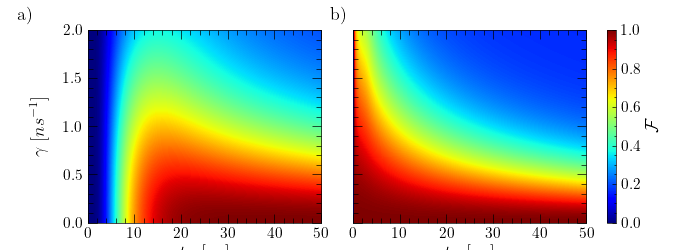

Figure saved


In [22]:
save = True  # Parameter that control is the function must be saved

cmap='jet'

fig=plt.figure(figsize=(7, 2.5))
ratios=[1,1,0.05]
grid = plt.GridSpec(ncols=3,nrows=1, wspace=0.2, width_ratios=ratios)
ax1 = fig.add_subplot(grid[0])
ax2 = fig.add_subplot(grid[1])
ax3 = fig.add_subplot(grid[2],xticklabels=[],yticklabels=[])


data1 = fidelity1.transpose()
pos1 = ax1.imshow(data1, origin='lower', cmap=cmap, aspect='auto', extent=[tf_vector1[0], tf_vector1[-1], gamma_vector1[0],
                                                                            gamma_vector1[-1]],interpolation='spline16', vmax=1)
# cbar = fig.colorbar(pos, ax=ax)
# cbar.set_label(r'$\mathcal{F}$')
ax1.set_xlabel(r'$t_F\; [ns]$')
ax1.set_ylabel(r'$\gamma\; [ns^{-1}] $',labelpad=10)

data2 = fidelity2.transpose()
pos2 = ax2.imshow(data2, origin='lower', cmap=cmap, aspect='auto', extent=[tf_vector2[0], tf_vector2[-1], gamma_vector2[0],
                                                                            gamma_vector2[-1]],interpolation='spline16', vmax=1)

cbar = fig.colorbar(pos2, ax=ax3,fraction=2)
ax3.set_axis_off()
cbar.set_label(r'$\mathcal{F}$', fontsize=13)
cbar.ax.tick_params(labelsize=11)


ax2.set_xlabel(r'$t_F\; [ns]$')

ticks=11
labels=13

ax1.text(-15,2.1,'a)',{'fontsize':13})
ax2.text(-5,2.1,'b)',{'fontsize':13})

modify_plot(ax1, tick_direction='in', label_size=labels, tick_label_size=ticks, y_ticks_vector=np.arange(0,2.5,0.5),
            x_ticks_vector=np.arange(0,51,10))
modify_plot(ax2, tick_direction='in', label_size=labels, tick_label_size=ticks,y_ticks_vector=np.arange(0,2.5,0.5)
            ,x_ticks_vector=np.arange(0,51,10))
ax2.yaxis.set_ticklabels([])

if save:
    save_figure(fig,'CTAP_vs_STA', overwrite=save, dic='thesis', extension='pdf')